In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
county_facts = "county_facts.csv"
primary_results = "primary_results.csv"
#primary_inverse = "fips_index.csv"

In [5]:
county_facts_df = pd.read_csv(county_facts, encoding="ISO-8859-1")
primary_results_df = pd.read_csv(primary_results, encoding="ISO-8859-1")
#primary_inverse = pd.read_csv(primary_inverse, encoding="ISO-8859-1")

In [6]:
# County facts dataframe
county_facts_df.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [7]:
#county_facts_df.count()

In [8]:
# Remove all NaN
county_facts_df = county_facts_df.dropna(how='any')

# Set dataframe to show specific columns
county_facts_cleaned_df = county_facts_df[["fips", "area_name", "PST120214", "POP010210", "POP645213", "VET605213", 
                                   "LFE305213", "INC110213", "PVY020213", "SBO001207", "SBO315207", "SBO215207",
                                  "SBO415207", "SBO015207", "MAN450207", "RTN130207", "RTN131207", "BPS030214", 
                                   "LND110210", "POP060210"]]
county_facts_cleaned_df.head()

,fips,area_name,PST120214,POP010210,POP645213,VET605213,LFE305213,INC110213,PVY020213,SBO001207,SBO315207,SBO215207,SBO415207,SBO015207,MAN450207,RTN130207,RTN131207,BPS030214,LND110210,POP060210
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,31.7,0,598175,12003,131,594.44,91.8
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,27.3,1410273,2966489,17166,1384,1589.78,114.6
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,27.0,0,188337,6334,8,884.88,31.0
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,0.0,0,124707,5804,19,622.58,36.8
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,23.2,341544,319700,5622,3,644.78,88.9


In [9]:
# Rename columns
county_facts_cleaned_df = county_facts_cleaned_df.rename(columns={"area_name":"County", 
                                                  "PST120214":"Population % Change", 
                                                  "POP010210":"2010 Population", 
                                                  "POP645213":"% Foreign Born", 
                                                  "VET605213":"Veterans",
                                                  "LFE305213":"Mean Travel Time", 
                                                  "INC110213":"Median Household Income", 
                                                  "PVY020213":"Below Poverty Level", 
                                                  "SBO001207":"Total Number of Firms", 
                                                  "SBO315207":"% Black-owned Firms", 
                                                  "SBO215207":"% Asian-owned Firms",
                                                  "SBO415207":"% Hispanic-owned Firms", 
                                                  "SBO015207":"% Women-owned Firms", 
                                                  "MAN450207":"Manufacturers Shipments ($1000)", 
                                                  "RTN130207":"Retail Sales ($1000)",
                                                  "RTN131207":"Retail Sales per Capita",
                                                  "BPS030214":"Building permits",
                                                  "LND110210":"Land Area (Square Miles)", 
                                                  "POP060210":"Population per Square Mile"})
county_facts_cleaned_df.head()

,fips,County,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,Manufacturers Shipments ($1000),Retail Sales ($1000),Retail Sales per Capita,Building permits,Land Area (Square Miles),Population per Square Mile
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,31.7,0,598175,12003,131,594.44,91.8
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,27.3,1410273,2966489,17166,1384,1589.78,114.6
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,27.0,0,188337,6334,8,884.88,31.0
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,0.0,0,124707,5804,19,622.58,36.8
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,23.2,341544,319700,5622,3,644.78,88.9


In [10]:
#qqq = pd.pivot_table(county_facts_cleaned_df, values='D', index=['A', 'B'],
#...                     columns=['C'], aggfunc=np.sum)

In [11]:
# Drop all NaN from primary results dataframe
primary_results_df = primary_results_df.dropna(how='any')


In [12]:
# Set dataframe to show specific columns
primary_results_cleaned_df = primary_results_df[["fips", "party", "candidate", "votes", "fraction_votes"]]


In [13]:
# Rename columns
primary_results_cleaned_df = primary_results_cleaned_df.rename(columns={"party":"Party",
                                                                       "candidate":"Candidate",
                                                                       "votes":"Votes",})

In [14]:
len(primary_results_cleaned_df)



24511

In [15]:
primary_results_cleaned_df.head()

,fips,Party,Candidate,Votes,fraction_votes
0,1001.0,Democrat,Bernie Sanders,544,0.182
1,1001.0,Democrat,Hillary Clinton,2387,0.800
2,1003.0,Democrat,Bernie Sanders,2694,0.329
3,1003.0,Democrat,Hillary Clinton,5290,0.647
4,1005.0,Democrat,Bernie Sanders,222,0.078


In [16]:
aaa = primary_results_cleaned_df.set_index('fips')
aaa.head()


,Party,Candidate,Votes,fraction_votes
fips,,,,
1001.0,Democrat,Bernie Sanders,544,0.182
1001.0,Democrat,Hillary Clinton,2387,0.800
1003.0,Democrat,Bernie Sanders,2694,0.329
1003.0,Democrat,Hillary Clinton,5290,0.647
1005.0,Democrat,Bernie Sanders,222,0.078


In [17]:
reps = aaa.loc[aaa["Party"] == "Republican", :]
reps.head(2)

,Party,Candidate,Votes,fraction_votes
fips,,,,
1001.0,Republican,Ben Carson,1764,0.146
1001.0,Republican,Donald Trump,5387,0.445


In [18]:
dems = aaa.loc[aaa["Party"] == "Democrat", :]
dems.head(2)

,Party,Candidate,Votes,fraction_votes
fips,,,,
1001.0,Democrat,Bernie Sanders,544,0.182
1001.0,Democrat,Hillary Clinton,2387,0.800


In [19]:
reps1 = pd.pivot_table(reps, values= ["Votes", "Party"], index=['fips'], columns=["Candidate"], fill_value=0)
reps1.head(2)

Votes                                                     \
Candidate Ben Carson Carly Fiorina Chris Christie Donald Trump Jeb Bush   
fips                                                                      
1001.0          1764             0              0         5387        0   
1003.0          4221             0              0        23618        0   

                                                                         \
Candidate John Kasich Marco Rubio Mike Huckabee Rand Paul Rick Santorum   
fips                                                                      
1001.0            421        1785             0         0             0   
1003.0           2987        9703             0         0             0   

                    
Candidate Ted Cruz  
fips                
1001.0        2482  
1003.0        8571

In [20]:
dems1 = pd.pivot_table(dems, values= ["Votes", "Party"], index=['fips'], columns=["Candidate"], fill_value=0)
dems1.head(2)

Votes                                              \
Candidate  No Preference  Uncommitted Bernie Sanders Hillary Clinton   
fips                                                                   
1001.0                 0            0            544            2387   
1003.0                 0            0           2694            5290   

                           
Candidate Martin O'Malley  
fips                       
1001.0                  0  
1003.0                  0

In [24]:
def MostVotesD(row):
    test = row[['Bernie Sanders','Hillary Clinton','Martin O Malley']]
    return np.argmax(row)


In [25]:
dem_most_votes = dems1.apply(MostVotesD, axis=1)

ValueError: ('attempt to get argmax of an empty sequence', 'occurred at index 1001.0')

In [23]:
dem_most_votes.value_counts()

(Votes, Bernie Sanders)     2271
(Votes, Hillary Clinton)    1837
(Votes,  No Preference)       87
dtype: int64

In [22]:
dems1['Most Votes'] = dem_most_votes
dems1.head()

Votes                                              \
Candidate  No Preference  Uncommitted Bernie Sanders Hillary Clinton   
fips                                                                   
1001.0                 0            0            544            2387   
1003.0                 0            0           2694            5290   
1005.0                 0            0            222            2567   
1007.0                 0            0            246             942   
1009.0                 0            0            395             564   

                                         Most Votes  
Candidate Martin O'Malley                            
fips                                                 
1001.0                  0  (Votes, Hillary Clinton)  
1003.0                  0  (Votes, Hillary Clinton)  
1005.0                  0  (Votes, Hillary Clinton)  
1007.0                  0  (Votes, Hillary Clinton)  
1009.0                  0  (Votes, Hillary Clinton)

In [23]:
def MostVotesR(row):
    test = row[['Ben Carson', 'Carly Fiorina', 'Chris Christie', 'Donald Trump', 'Jeb Bush', 'John Kasich', 'Marco Rubio', 'Mike Huckabee', 'Rand Paul', 'Rick Santorum', 'Ted Cruz']]
    return np.argmax(row)

In [24]:
rep_most_votes = reps1.apply(MostVotesR, axis=1)

In [25]:
rep_most_votes.value_counts()

(Votes, Donald Trump)    2713
(Votes, Ted Cruz)         654
(Votes, John Kasich)      157
(Votes, Marco Rubio)       48
(Votes, Ben Carson)         4
dtype: int64

In [39]:
reps1['Most Votes'] = rep_most_votes
reps1.head()

Votes                                                     \
Candidate Ben Carson Carly Fiorina Chris Christie Donald Trump Jeb Bush   
fips                                                                      
1001.0          1764             0              0         5387        0   
1003.0          4221             0              0        23618        0   
1005.0           417             0              0         1710        0   
1007.0           393             0              0         1959        0   
1009.0          1523             0              0         7390        0   

                                                                         \
Candidate John Kasich Marco Rubio Mike Huckabee Rand Paul Rick Santorum   
fips                                                                      
1001.0            421        1785             0         0             0   
1003.0           2987        9703             0         0             0   
1005.0            123         498             0         0             0   
1007.0             84         444             0         0             0   
1009.0            337        1843             0         0             0   

                               Most Votes  
Candidate Ted Cruz                         
fips                                       
1001.0        2482  (Votes, Donald Trump)  
1003.0        8571  (Votes, Donald Trump)  
1005.0         609  (Votes, Donald Trump)  
1007.0        1011  (Votes, Donald Trump)  
1009.0        3698  (Votes, Donald Trump)

In [26]:
# ab = pd.merge(aaaa, abc, on="fips")

In [27]:
#fips_merge_df = pd.merge(county_facts_cleaned_df, primary_results_cleaned_df, on="fips")


In [28]:
#len(fips_merge_df)

In [29]:
#fips_merge_df

In [30]:
#fips_merge_df.to_csv("training_data.csv", index=False, header=True)

In [31]:
#primary_results_df.head()

In [32]:
# primary_results_sorted = primary_results_df.sort_values(["fips", "votes"], ascending=True)
# primary_results_sorted.head()

In [33]:
len(primary_results_cleaned_df["Candidate"].unique())

16

In [34]:
# primary_results_alabama_df = primary_results_df.loc[primary_results_df["state"] == "Alabama", :]
# primary_results_republican_df = primary_results_df.loc[primary_results_df["party"] == "Republican", :]
# primary_results_democrat_df = primary_results_df.loc[primary_results_df["party"] == "Democrat", :]
# primary_results_democrat_df.head()
# primary_results_democrat_sorted = primary_results_democrat_df.sort_values(["fips", "votes"], ascending=True)
# primary_results_democrat_sorted = primary_results_democrat_sorted.sort_values(["fips"], ascending=True)
# 8959 rows
# primary_results_democrat_sorted.nlargest(keep="last")
# primary_results_democrat_df.nlargest(100, ["fips", "votes"], keep="first")

In [35]:
#merge_02 = county_facts_cleaned.merge(primary_inverse, )

In [40]:
dem_merge= pd.merge(county_facts_cleaned_df, dems1, left_on="fips", right_index=True)
dem_merge.head()

C:\Users\cobin\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,fips,County,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,...,Retail Sales per Capita,Building permits,Land Area (Square Miles),Population per Square Mile,"(Votes, No Preference)","(Votes, Uncommitted)","(Votes, Bernie Sanders)","(Votes, Hillary Clinton)","(Votes, Martin O'Malley)","(Most Votes, )"
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,...,12003,131,594.44,91.8,0,0,544,2387,0,"(Votes, Hillary Clinton)"
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,...,17166,1384,1589.78,114.6,0,0,2694,5290,0,"(Votes, Hillary Clinton)"
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,...,6334,8,884.88,31.0,0,0,222,2567,0,"(Votes, Hillary Clinton)"
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,...,5804,19,622.58,36.8,0,0,246,942,0,"(Votes, Hillary Clinton)"
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,...,5622,3,644.78,88.9,0,0,395,564,0,"(Votes, Hillary Clinton)"


In [41]:
dem_merge.columns


Index([                           'fips',                          'County',
                   'Population % Change',                 '2010 Population',
                        '% Foreign Born',                        'Veterans',
                      'Mean Travel Time',         'Median Household Income',
                   'Below Poverty Level',           'Total Number of Firms',
                   '% Black-owned Firms',             '% Asian-owned Firms',
                '% Hispanic-owned Firms',             '% Women-owned Firms',
       'Manufacturers Shipments ($1000)',            'Retail Sales ($1000)',
               'Retail Sales per Capita',                'Building permits',
              'Land Area (Square Miles)',      'Population per Square Mile',
             ('Votes', ' No Preference'),         ('Votes', ' Uncommitted'),
             ('Votes', 'Bernie Sanders'),      ('Votes', 'Hillary Clinton'),
            ('Votes', 'Martin O'Malley'),                ('Most Votes', '')]

In [60]:
dem_clean = dem_merge.drop(columns=['County', 'Population % Change', '2010 Population', 'Land Area (Square Miles)', ])
dem_clean.head(100)

,fips,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,...,Retail Sales ($1000),Retail Sales per Capita,Building permits,Population per Square Mile,"(Votes, No Preference)","(Votes, Uncommitted)","(Votes, Bernie Sanders)","(Votes, Hillary Clinton)","(Votes, Martin O'Malley)","(Most Votes, )"
2,1001,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,...,598175,12003,131,91.8,0,0,544,2387,0,"(Votes, Hillary Clinton)"
3,1003,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,...,2966489,17166,1384,114.6,0,0,2694,5290,0,"(Votes, Hillary Clinton)"
4,1005,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,...,188337,6334,8,31.0,0,0,222,2567,0,"(Votes, Hillary Clinton)"
5,1007,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,...,124707,5804,19,36.8,0,0,246,942,0,"(Votes, Hillary Clinton)"
6,1009,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,...,319700,5622,3,88.9,0,0,395,564,0,"(Votes, Hillary Clinton)"
7,1011,5.4,636,26.9,32033,21.6,417,0.0,0.0,0.0,...,43810,3995,1,17.5,0,0,178,2451,0,"(Votes, Hillary Clinton)"
8,1013,0.8,1497,24.0,29918,28.4,1769,0.0,3.3,0.0,...,229277,11326,2,27.0,0,0,156,2196,0,"(Votes, Hillary Clinton)"
9,1015,2.4,11385,22.5,39962,21.9,8713,7.2,1.6,0.5,...,1542981,13678,114,195.7,0,0,1425,5011,0,"(Votes, Hillary Clinton)"
10,1017,1.1,2691,24.6,32402,24.1,1981,0.0,0.0,0.0,...,264650,7620,8,57.4,0,0,312,2899,0,"(Votes, Hillary Clinton)"
11,1019,0.7,2174,26.9,34907,21.2,2180,0.0,0.0,0.0,...,186321,7613,2,46.9,0,0,268,712,0,"(Votes, Hillary Clinton)"


In [ ]:
# # Rename columns
# merge_clean = final_clean.rename(columns={"('Votes', ' No Preference')": "No Pref",
#                                        "('Votes', ' Uncommitted')": "Uncommitted",
#                                        "('Votes', 'Ben Carson')": "Ben Carson",
#                                        "('Votes', 'Bernie Sanders')": "Bernie Sanders",
#                                        "('Votes', 'Carly Fiorina')": "Carly Fiorina",  
#                                        "('Votes', 'Chris Christie')": "Chris Christie",
#                                        "('Votes', 'Donald Trump')": "Donald Trump",
#                                        "('Votes', 'Hillary Clinton')": "Hillary Clinton",
#                                        "('Votes', 'Jeb Bush')":"Jeb Bush",       
#                                        "('Votes', 'John Kasich')": "John Kasich",
#                                        "('Votes', 'Marco Rubio')": "Marco Rubio",     
#                                        "('Votes', 'Martin O'Malley')": "Martin O'Malley",
#                                        "('Votes', 'Mike Huckabee')": "Mike Huckabee", 
#                                        "('Votes', 'Rand Paul')": "Rand Paul",
#                                        "('Votes', 'Rick Santorum')": "Rick Santorum",   
#                                        "('Votes', 'Ted Cruz')": "Ted Cruz"})
# merge_clean.head()

In [ ]:
# merge_clean.columns

In [45]:
rep_merge= pd.merge(county_facts_cleaned_df, reps1, left_on="fips", right_index=True)
rep_merge.head()

C:\Users\cobin\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,fips,County,Population % Change,2010 Population,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,...,"(Votes, Chris Christie)","(Votes, Donald Trump)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)","(Most Votes, )"
2,1001,Autauga County,1.5,54571,1.6,5922,26.2,53682,12.1,4067,...,0,5387,0,421,1785,0,0,0,2482,"(Votes, Donald Trump)"
3,1003,Baldwin County,9.8,182265,3.6,19346,25.9,50221,13.9,19035,...,0,23618,0,2987,9703,0,0,0,8571,"(Votes, Donald Trump)"
4,1005,Barbour County,-2.1,27457,2.9,2120,24.6,32911,26.7,1667,...,0,1710,0,123,498,0,0,0,609,"(Votes, Donald Trump)"
5,1007,Bibb County,-1.8,22915,1.2,1327,27.6,36447,18.1,1385,...,0,1959,0,84,444,0,0,0,1011,"(Votes, Donald Trump)"
6,1009,Blount County,0.7,57322,4.3,4540,33.9,44145,15.8,4458,...,0,7390,0,337,1843,0,0,0,3698,"(Votes, Donald Trump)"


In [49]:
rep_merge.columns


Index([                           'fips',                          'County',
                   'Population % Change',                 '2010 Population',
                        '% Foreign Born',                        'Veterans',
                      'Mean Travel Time',         'Median Household Income',
                   'Below Poverty Level',           'Total Number of Firms',
                   '% Black-owned Firms',             '% Asian-owned Firms',
                '% Hispanic-owned Firms',             '% Women-owned Firms',
       'Manufacturers Shipments ($1000)',            'Retail Sales ($1000)',
               'Retail Sales per Capita',                'Building permits',
              'Land Area (Square Miles)',      'Population per Square Mile',
                 ('Votes', 'Ben Carson'),        ('Votes', 'Carly Fiorina'),
             ('Votes', 'Chris Christie'),         ('Votes', 'Donald Trump'),
                   ('Votes', 'Jeb Bush'),          ('Votes', 'John Kasich'),

In [59]:
rep_clean = rep_merge.drop(columns=['County', 'Population % Change', '2010 Population', 'Land Area (Square Miles)', ])
rep_clean.tail(100)

,fips,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,...,"(Votes, Chris Christie)","(Votes, Donald Trump)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)","(Most Votes, )"
3070,54055,1.3,5385,22.2,34842,22.2,3671,3.5,0.0,0.0,...,0,5526,0,205,0,0,0,0,601,"(Votes, Donald Trump)"
3071,54057,0.2,2486,25.3,31163,15.8,1886,0.0,0.0,0.0,...,0,3481,0,176,0,0,0,0,365,"(Votes, Donald Trump)"
3072,54059,0.6,1422,30.2,35955,22.9,1140,0.0,0.0,0.0,...,0,1161,0,22,0,0,0,0,56,"(Votes, Donald Trump)"
3073,54061,4.5,5456,20.8,44173,22.4,5962,0.0,3.6,0.0,...,0,5971,0,943,0,0,0,0,851,"(Votes, Donald Trump)"
3074,54063,0.3,1055,34.4,41234,13.6,1316,0.0,0.0,0.0,...,0,1557,0,80,0,0,0,0,148,"(Votes, Donald Trump)"
3075,54065,1.4,1356,33.5,36046,15.3,1523,0.0,0.0,0.0,...,0,2824,0,200,0,0,0,0,318,"(Votes, Donald Trump)"
3076,54067,1.4,1916,27.9,40064,19.2,2023,0.0,0.0,0.0,...,0,2210,0,125,0,0,0,0,175,"(Votes, Donald Trump)"
3077,54069,1.5,3745,19.5,41025,15.4,4189,0.0,0.0,0.0,...,0,3875,0,713,0,0,0,0,504,"(Votes, Donald Trump)"
3078,54071,0.2,743,32.4,34175,18.8,662,0.0,0.0,0.0,...,0,587,0,32,0,0,0,0,41,"(Votes, Donald Trump)"
3079,54073,0.3,674,27.7,41859,14.6,491,0.0,0.0,0.0,...,0,855,0,82,0,0,0,0,120,"(Votes, Donald Trump)"


In [64]:
dems_clean = dem_clean.set_index('fips')
dems_clean.head()

,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,...,Retail Sales ($1000),Retail Sales per Capita,Building permits,Population per Square Mile,"(Votes, No Preference)","(Votes, Uncommitted)","(Votes, Bernie Sanders)","(Votes, Hillary Clinton)","(Votes, Martin O'Malley)","(Most Votes, )"
fips,,,,,,,,,,,,,,,,,,,,,
1001,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,31.7,...,598175,12003,131,91.8,0,0,544,2387,0,"(Votes, Hillary Clinton)"
1003,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,27.3,...,2966489,17166,1384,114.6,0,0,2694,5290,0,"(Votes, Hillary Clinton)"
1005,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,27.0,...,188337,6334,8,31.0,0,0,222,2567,0,"(Votes, Hillary Clinton)"
1007,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,0.0,...,124707,5804,19,36.8,0,0,246,942,0,"(Votes, Hillary Clinton)"
1009,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,23.2,...,319700,5622,3,88.9,0,0,395,564,0,"(Votes, Hillary Clinton)"


In [63]:
reps_clean = rep_clean.set_index('fips')
reps_clean.head()

,% Foreign Born,Veterans,Mean Travel Time,Median Household Income,Below Poverty Level,Total Number of Firms,% Black-owned Firms,% Asian-owned Firms,% Hispanic-owned Firms,% Women-owned Firms,...,"(Votes, Chris Christie)","(Votes, Donald Trump)","(Votes, Jeb Bush)","(Votes, John Kasich)","(Votes, Marco Rubio)","(Votes, Mike Huckabee)","(Votes, Rand Paul)","(Votes, Rick Santorum)","(Votes, Ted Cruz)","(Most Votes, )"
fips,,,,,,,,,,,,,,,,,,,,,
1001,1.6,5922,26.2,53682,12.1,4067,15.2,1.3,0.7,31.7,...,0,5387,0,421,1785,0,0,0,2482,"(Votes, Donald Trump)"
1003,3.6,19346,25.9,50221,13.9,19035,2.7,1.0,1.3,27.3,...,0,23618,0,2987,9703,0,0,0,8571,"(Votes, Donald Trump)"
1005,2.9,2120,24.6,32911,26.7,1667,0.0,0.0,0.0,27.0,...,0,1710,0,123,498,0,0,0,609,"(Votes, Donald Trump)"
1007,1.2,1327,27.6,36447,18.1,1385,14.9,0.0,0.0,0.0,...,0,1959,0,84,444,0,0,0,1011,"(Votes, Donald Trump)"
1009,4.3,4540,33.9,44145,15.8,4458,0.0,0.0,0.0,23.2,...,0,7390,0,337,1843,0,0,0,3698,"(Votes, Donald Trump)"


In [69]:
# dems_clean.to_csv("dems.csv", index=True, header=True)

In [70]:
# reps_clean.to_csv("reps.csv", index=True, header=True)

In [ ]:
#primary_inverse = primary_results_df[["fips", "candidate", "votes"]]

In [ ]:
# clean.corr()

In [43]:
import seaborn


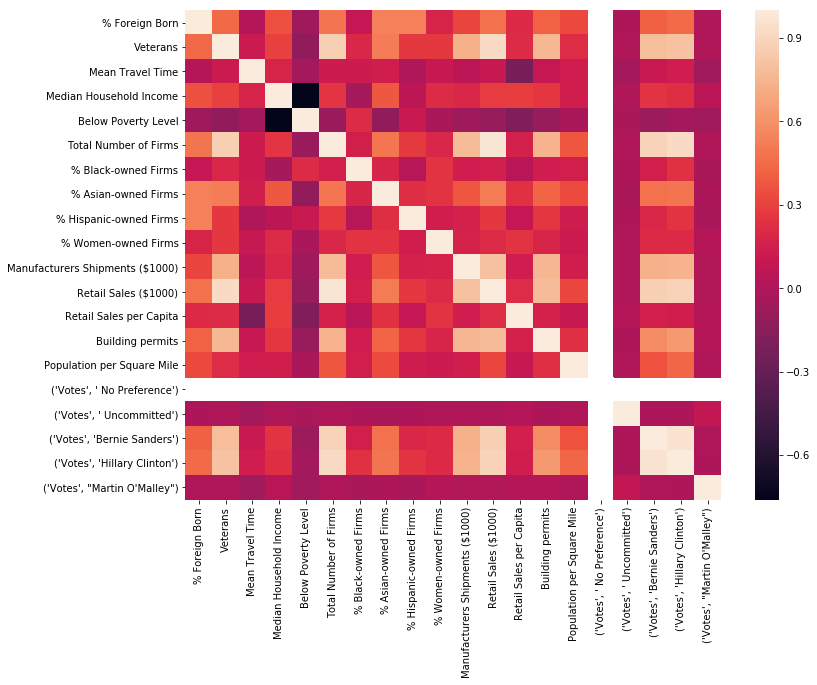

In [67]:
fig, ax=plt.subplots(figsize=(12,9))
seaborn.heatmap(dems_clean.corr(), ax=ax)

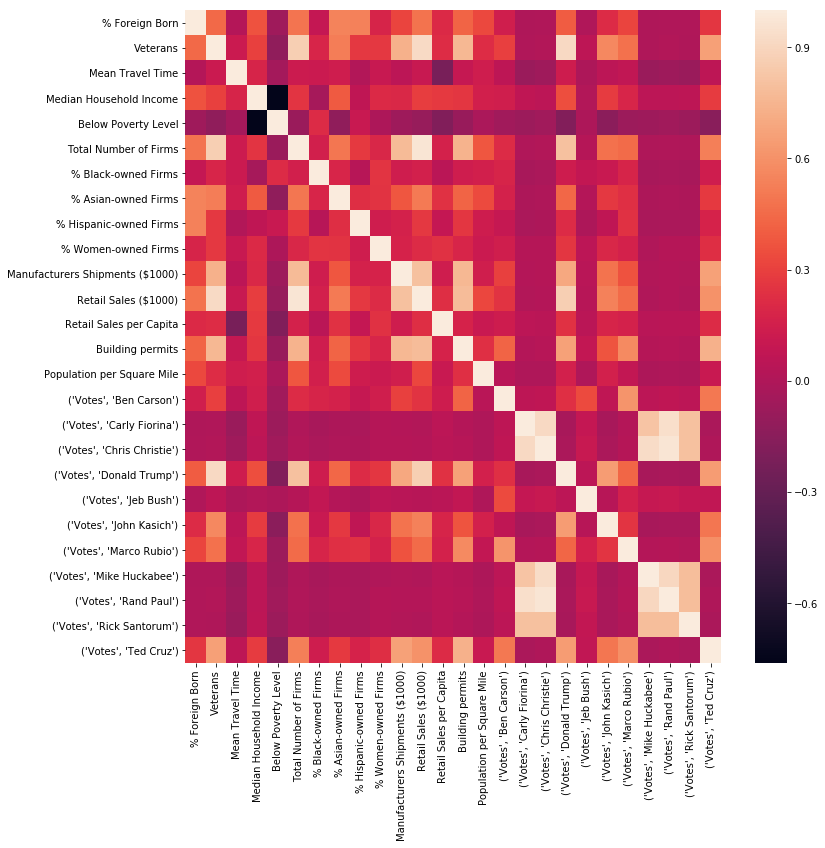

In [68]:
fig, ax=plt.subplots(figsize=(12,12))
seaborn.heatmap(reps_clean.corr(), ax=ax)